In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
#Bring in Data set
HousePrices = pd.read_csv('/Users/kalebbarnes/Downloads/CSV/house-prices-advanced-regression-techniques/train.csv')

In [38]:
HousePrices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
HousePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
#HousePrices
HPclean = HousePrices

In [41]:
## Loop that takes care of the NA values that we have in the data set
for col in HPclean.columns:
    if HPclean[col].dtype == 'object':
        HPclean[col] = HPclean[col].fillna('None')
    if HPclean[col].dtype == 'float64':
        HPclean[col] = HPclean[col].fillna(0)

In [42]:
#Swap object columns to categorical columns
for col in HPclean.columns:
    if HPclean[col].dtype == 'object':
        HPclean[col] = HPclean[col].astype('category').cat.codes


In [43]:
# Drop useless features
HPclean = HPclean.drop('Id', axis=1)
HPclean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


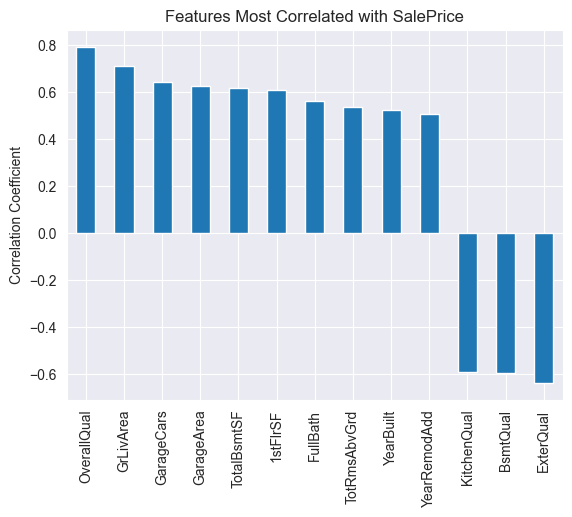

In [44]:
#HeatMap of correlation
import seaborn as sns

corr = HPclean.corr()
saleprice_corr = corr['SalePrice'].sort_values(ascending=False)
strong_corr = saleprice_corr[abs(saleprice_corr) > 0.5]

strong_corr.drop('SalePrice').plot(kind='bar')
plt.title('Features Most Correlated with SalePrice')
plt.ylabel('Correlation Coefficient')
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

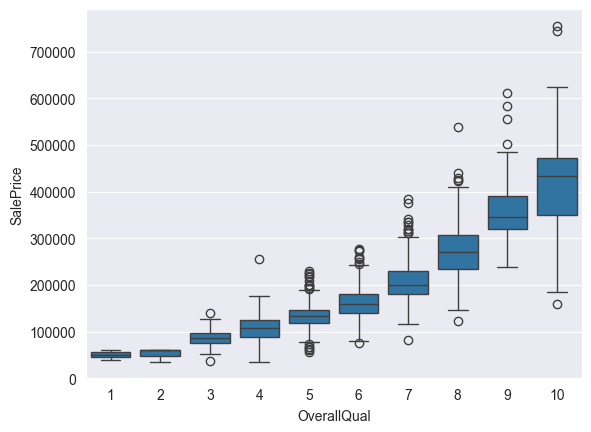

In [45]:
sns.boxplot(x='OverallQual', y='SalePrice', data=HPclean)

<Axes: xlabel='YrSold'>

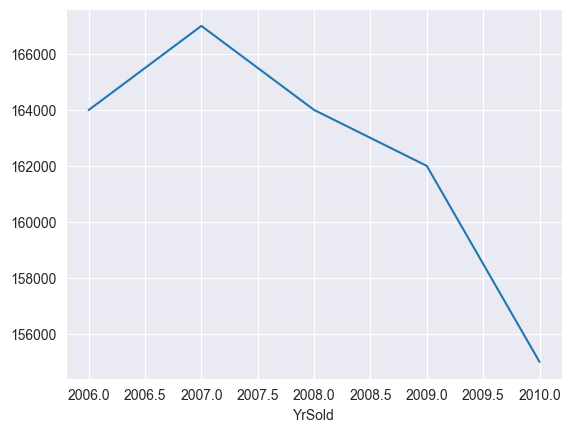

In [46]:
HPclean.groupby('YrSold')['SalePrice'].median().plot()

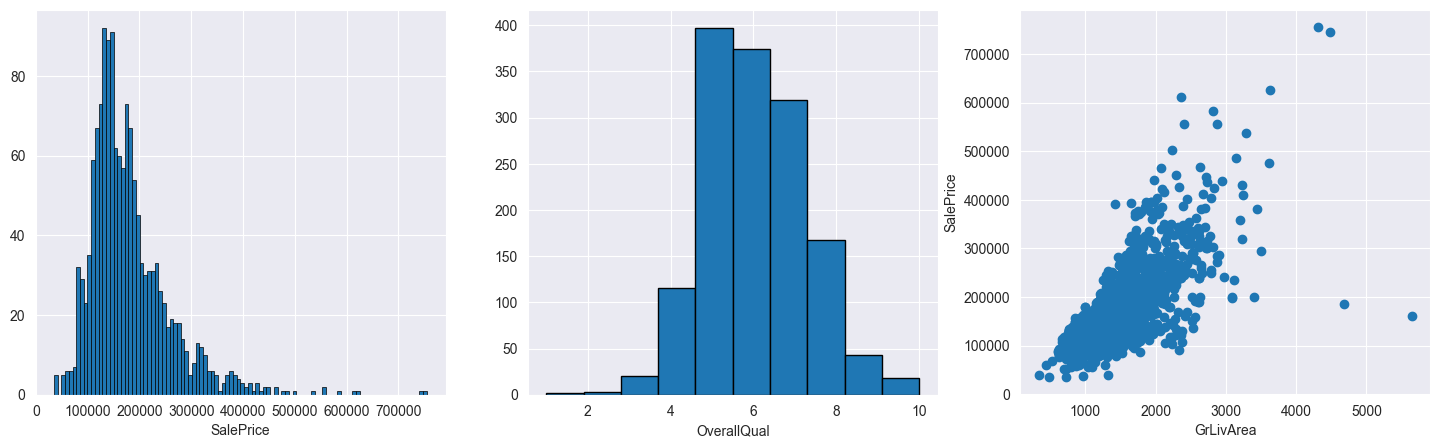

In [47]:
fig, ax = plt.subplots(1, 3,figsize=(18,5))

ax[0].hist(HPclean['SalePrice'], bins=100, linewidth = 0.5, edgecolor='k')
ax[1].hist(HPclean['OverallQual'], bins=10, edgecolor='k')
ax[2].scatter(HPclean['GrLivArea'], HPclean['SalePrice'])

ax[0].set(xlabel='SalePrice' )
ax[1].set(xlabel='OverallQual')
ax[2].set(xlabel='GrLivArea', ylabel='SalePrice')
plt.show()

In [48]:
#Train Test Split of the Data
x = HPclean.drop('SalePrice', axis=1)
y = HPclean['SalePrice']
ylog = np.log1p(y)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import itertools

In [50]:
def exhaustive_selection_cv(X, y, model, scoring='r2', cv=5):
    best_score = -np.inf
    best_features = None
    best_scores = []

    for k in range(1, len(X.columns) + 1):
        for subset in itertools.combinations(X.columns, k):
            # Perform cross-validation on the subset
            scores = cross_val_score(model, X[list(subset)], y, scoring=scoring, cv=cv)
            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_features = subset
                best_score = mean_score

        best_scores.append(best_score)

    print(f"Best feature subset: {best_features}")
    print(f"Best CV Score: {best_score}")
    print(f"Scores by number of features: {best_scores}")

    plt.plot(range(1, len(X.columns) + 1), best_scores)
    plt.xlabel("Number of Features")
    plt.ylabel(f"Best {scoring} Score")
    plt.title("Exhaustive Feature Selection with Cross-Validation")
    plt.show()

    return best_features

In [51]:
def stepwise_selection_cv(X, y, model, scoring='neg_root_mean_squared_error', cv=5):
    remaining_features = set(X.columns)
    selected_features = []
    best_scores = []
    current_score = -np.inf   # Still maximizing neg-MSE

    while remaining_features:
        scores_with_candidates = []

        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            scores = cross_val_score(model, X[candidate_features], y, scoring=scoring, cv=cv)
            mean_score = np.mean(scores)   # This will be negative

            scores_with_candidates.append((mean_score, feature))

        # Find the candidate with the highest (least negative) score
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score > current_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
            best_scores.append(current_score)
            print(f"Added feature: {best_candidate}, New Best neg-MSE: {current_score:.4f}")
        else:
            print("No improvement. Stopping selection.")
            break

    print(f"\nSelected Features: {selected_features}")
    print(f"Best CV neg-RMSE: {current_score:.4f}")
    print(f"Approximate RMSE: {-current_score:.4f}")

    plt.plot(range(1, len(best_scores) + 1), [-score for score in best_scores], marker='o')
    plt.xlabel("Number of Features")
    plt.ylabel("RMSE")
    plt.title("Forward Stepwise Selection (Minimizing RMSE)")
    plt.show()

    return selected_features


Added feature: OverallQual, New Best neg-MSE: -48492.8758
Added feature: GrLivArea, New Best neg-MSE: -42586.9947
Added feature: BsmtFinSF1, New Best neg-MSE: -40361.1090
Added feature: ExterQual, New Best neg-MSE: -38453.1406
Added feature: GarageCars, New Best neg-MSE: -37164.1791
Added feature: MSSubClass, New Best neg-MSE: -36240.7597
Added feature: KitchenQual, New Best neg-MSE: -35586.4004
Added feature: BsmtExposure, New Best neg-MSE: -35062.0852
Added feature: BsmtQual, New Best neg-MSE: -34694.3673
Added feature: LotArea, New Best neg-MSE: -34398.1749
Added feature: OverallCond, New Best neg-MSE: -34132.9682
Added feature: YearBuilt, New Best neg-MSE: -33724.5741
Added feature: Fireplaces, New Best neg-MSE: -33507.9859
Added feature: Functional, New Best neg-MSE: -33334.4050
Added feature: GarageYrBlt, New Best neg-MSE: -33213.8021
Added feature: ScreenPorch, New Best neg-MSE: -33108.1331
Added feature: PoolArea, New Best neg-MSE: -32998.5694
Added feature: Neighborhood, New B

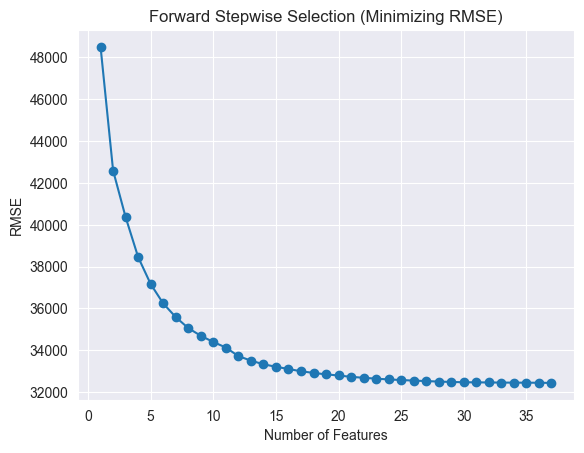

In [52]:
lr = LinearRegression()
best_subset = stepwise_selection_cv(x, y, lr)

Added feature: OverallQual, New Best neg-MSE: -48492.6530
Added feature: GrLivArea, New Best neg-MSE: -42586.9372
Added feature: BsmtFinSF1, New Best neg-MSE: -40360.9933
Added feature: ExterQual, New Best neg-MSE: -38453.0244
Added feature: GarageCars, New Best neg-MSE: -37163.8703
Added feature: MSSubClass, New Best neg-MSE: -36240.2521
Added feature: KitchenQual, New Best neg-MSE: -35585.6894
Added feature: BsmtExposure, New Best neg-MSE: -35061.3945
Added feature: BsmtQual, New Best neg-MSE: -34693.5728
Added feature: LotArea, New Best neg-MSE: -34397.3496
Added feature: OverallCond, New Best neg-MSE: -34132.0950
Added feature: YearBuilt, New Best neg-MSE: -33723.5862
Added feature: Fireplaces, New Best neg-MSE: -33507.0524
Added feature: Functional, New Best neg-MSE: -33333.5183
Added feature: GarageYrBlt, New Best neg-MSE: -33213.0762
Added feature: ScreenPorch, New Best neg-MSE: -33107.3972
Added feature: PoolArea, New Best neg-MSE: -32997.8230
Added feature: Neighborhood, New B

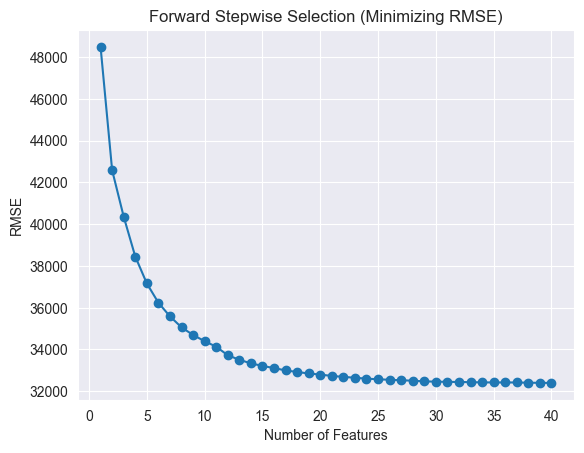

In [53]:
rr = Ridge()
best_subset = stepwise_selection_cv(x, y, rr)

Added feature: OverallQual, New Best neg-MSE: -48492.8709
Added feature: GrLivArea, New Best neg-MSE: -42586.9777
Added feature: BsmtFinSF1, New Best neg-MSE: -40361.1055
Added feature: ExterQual, New Best neg-MSE: -38453.1478
Added feature: GarageCars, New Best neg-MSE: -37164.1897
Added feature: MSSubClass, New Best neg-MSE: -36240.7669
Added feature: KitchenQual, New Best neg-MSE: -35586.4036
Added feature: BsmtExposure, New Best neg-MSE: -35062.0902
Added feature: BsmtQual, New Best neg-MSE: -34694.3697
Added feature: LotArea, New Best neg-MSE: -34398.1689
Added feature: OverallCond, New Best neg-MSE: -34132.9591
Added feature: YearBuilt, New Best neg-MSE: -33724.5588
Added feature: Fireplaces, New Best neg-MSE: -33507.9858
Added feature: Functional, New Best neg-MSE: -33334.4149
Added feature: GarageYrBlt, New Best neg-MSE: -33213.8267
Added feature: ScreenPorch, New Best neg-MSE: -33108.1496
Added feature: PoolArea, New Best neg-MSE: -32998.5825
Added feature: Neighborhood, New B

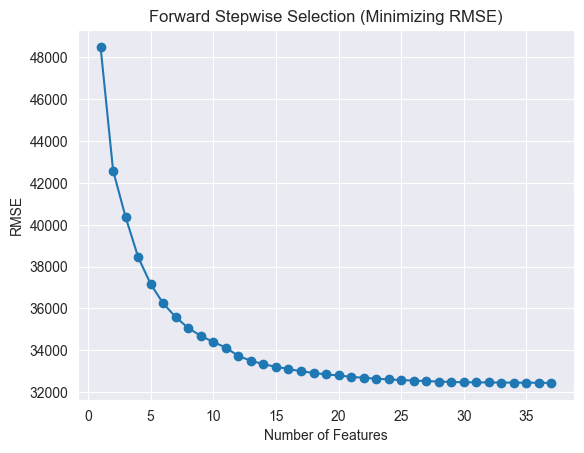

In [54]:
lasso = Lasso()
best_subset = stepwise_selection_cv(x, y, lasso)

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [56]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)

In [57]:
x_clusters = x.copy()
x_clusters['Clusters'] = clusters
x_clusters = pd.get_dummies(x_clusters, columns=['Clusters'], dtype=int)

In [58]:
x_clusters_scaled = scaler.fit_transform(x_clusters)
x_clusters_scaled = pd.DataFrame(x_clusters_scaled, columns=x_clusters.columns)

Added feature: OverallQual, New Best neg-MSE: -48492.8758
Added feature: GrLivArea, New Best neg-MSE: -42586.9947
Added feature: Clusters_4, New Best neg-MSE: -37687.9018
Added feature: YearBuilt, New Best neg-MSE: -35848.9149
Added feature: OverallCond, New Best neg-MSE: -35016.5709
Added feature: MSSubClass, New Best neg-MSE: -34369.1202
Added feature: KitchenQual, New Best neg-MSE: -33710.9694
Added feature: GarageCars, New Best neg-MSE: -33209.0374
Added feature: BsmtFullBath, New Best neg-MSE: -32737.7762
Added feature: BsmtExposure, New Best neg-MSE: -32514.5244
Added feature: Fireplaces, New Best neg-MSE: -32311.9886
Added feature: ExterQual, New Best neg-MSE: -32103.4256
Added feature: Functional, New Best neg-MSE: -31910.4016
Added feature: PoolArea, New Best neg-MSE: -31759.1719
Added feature: BsmtQual, New Best neg-MSE: -31629.7037
Added feature: BsmtFinType1, New Best neg-MSE: -31513.0427
Added feature: LotArea, New Best neg-MSE: -31451.6925
Added feature: ScreenPorch, New 

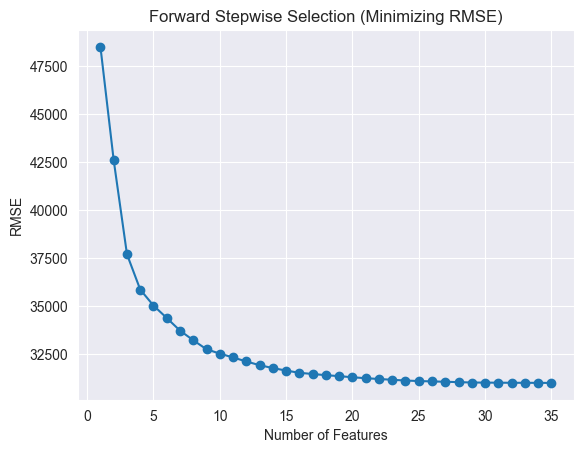

In [59]:
lr = LinearRegression()
best_subset = stepwise_selection_cv(x_clusters_scaled, y, lr)

Added feature: OverallQual, New Best neg-MSE: -48492.4644
Added feature: GrLivArea, New Best neg-MSE: -42586.3537
Added feature: Clusters_4, New Best neg-MSE: -37687.5027
Added feature: YearBuilt, New Best neg-MSE: -35848.4769
Added feature: OverallCond, New Best neg-MSE: -35016.2467
Added feature: MSSubClass, New Best neg-MSE: -34368.7946
Added feature: KitchenQual, New Best neg-MSE: -33710.6266
Added feature: GarageCars, New Best neg-MSE: -33208.2789
Added feature: BsmtFullBath, New Best neg-MSE: -32736.9038
Added feature: BsmtExposure, New Best neg-MSE: -32513.6288
Added feature: Fireplaces, New Best neg-MSE: -32310.8916
Added feature: ExterQual, New Best neg-MSE: -32102.1997
Added feature: Functional, New Best neg-MSE: -31909.2655
Added feature: PoolArea, New Best neg-MSE: -31758.4292
Added feature: BsmtQual, New Best neg-MSE: -31628.9343
Added feature: BsmtFinType1, New Best neg-MSE: -31512.2068
Added feature: LotArea, New Best neg-MSE: -31450.6533
Added feature: ScreenPorch, New 

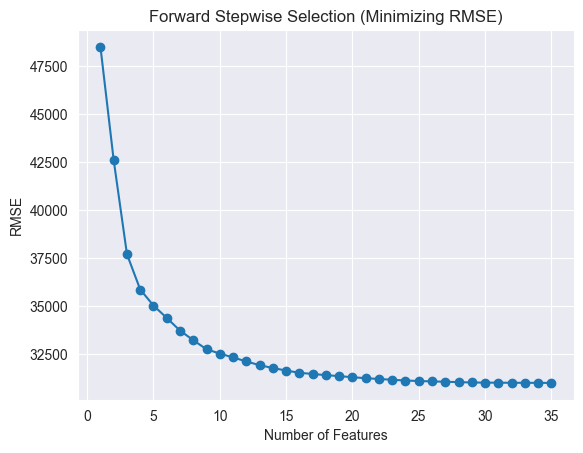

In [60]:
rr = Ridge()
best_subset = stepwise_selection_cv(x_clusters_scaled, y, rr)

Added feature: OverallQual, New Best neg-MSE: -48492.8690
Added feature: GrLivArea, New Best neg-MSE: -42586.9693
Added feature: Clusters_4, New Best neg-MSE: -37687.9037
Added feature: YearBuilt, New Best neg-MSE: -35848.9268
Added feature: OverallCond, New Best neg-MSE: -35016.5874
Added feature: MSSubClass, New Best neg-MSE: -34369.1444
Added feature: KitchenQual, New Best neg-MSE: -33710.9968
Added feature: GarageCars, New Best neg-MSE: -33209.0624
Added feature: BsmtFullBath, New Best neg-MSE: -32737.7989
Added feature: BsmtExposure, New Best neg-MSE: -32514.5433
Added feature: Fireplaces, New Best neg-MSE: -32311.9722
Added feature: ExterQual, New Best neg-MSE: -32103.4432
Added feature: Functional, New Best neg-MSE: -31910.4266
Added feature: PoolArea, New Best neg-MSE: -31759.2429
Added feature: BsmtQual, New Best neg-MSE: -31629.7870
Added feature: BsmtFinType1, New Best neg-MSE: -31513.1153
Added feature: LotArea, New Best neg-MSE: -31451.7910
Added feature: ScreenPorch, New 

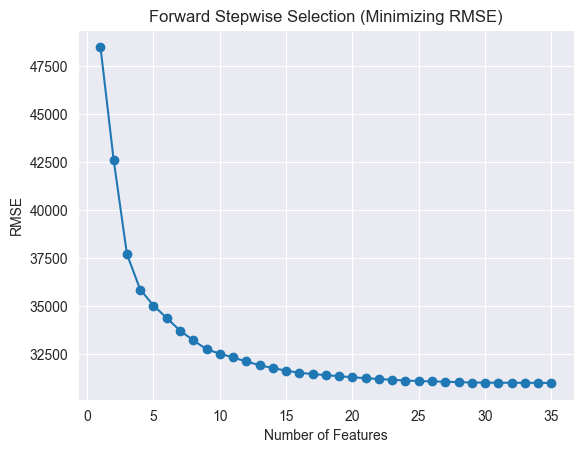

In [61]:
lasso = Lasso()
best_subset = stepwise_selection_cv(x_clusters_scaled, y, lasso)

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

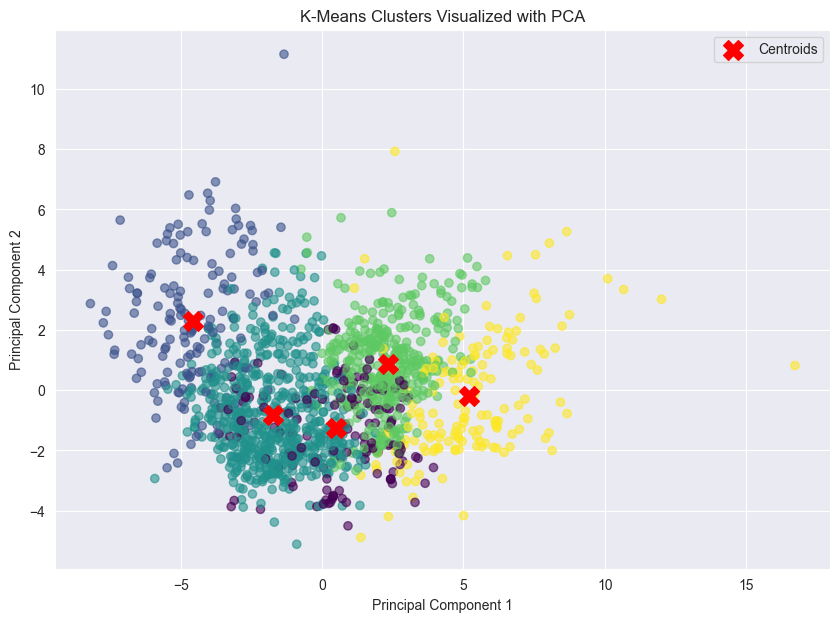

In [63]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)

# Optionally, plot cluster centers (projected via PCA)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_clusters_scaled, y, test_size=0.2, random_state=42)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [65]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Activation


model = Sequential([
    Input(shape=(84,)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1, activation='linear')  # use 'sigmoid' or 'softmax' for classification
])

In [66]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,953 (867.00 KB)

 Trainable params: 220,033 (859.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [67]:
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39507357696.0000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38919843840.0000 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [68]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

199131.1875


Added feature: OverallQual, New Best neg-MSE: -48492.4644
Added feature: GrLivArea, New Best neg-MSE: -42586.3537
Added feature: Clusters_4, New Best neg-MSE: -37687.5027
Added feature: YearBuilt, New Best neg-MSE: -35848.4769
Added feature: OverallCond, New Best neg-MSE: -35016.2467
Added feature: MSSubClass, New Best neg-MSE: -34368.7946
Added feature: KitchenQual, New Best neg-MSE: -33710.6266
Added feature: GarageCars, New Best neg-MSE: -33208.2789
Added feature: BsmtFullBath, New Best neg-MSE: -32736.9038
Added feature: BsmtExposure, New Best neg-MSE: -32513.6288
Added feature: Fireplaces, New Best neg-MSE: -32310.8916
Added feature: ExterQual, New Best neg-MSE: -32102.1997
Added feature: Functional, New Best neg-MSE: -31909.2655
Added feature: PoolArea, New Best neg-MSE: -31758.4292
Added feature: BsmtQual, New Best neg-MSE: -31628.9343
Added feature: BsmtFinType1, New Best neg-MSE: -31512.2068
Added feature: LotArea, New Best neg-MSE: -31450.6533
Added feature: ScreenPorch, New 

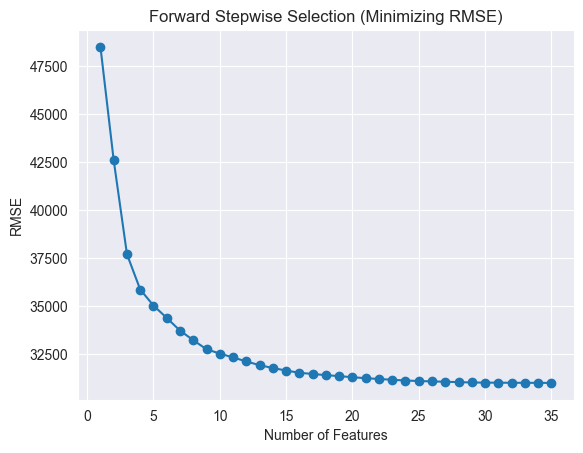

In [77]:
rr = Ridge()
best_subset = stepwise_selection_cv(x_clusters_scaled, y, rr)

In [79]:
rr.fit(X_train[best_subset], y_train)
y_pred = rr.predict(X_test[best_subset])


In [80]:
y_pred

array([143653.53802249, 343766.85459519, 113108.05458422, 180070.81565945,
       332471.41614161,  83944.47743186, 226933.33186765, 151771.94237411,
        84305.62065162, 143480.53684443, 150596.80681332, 110739.91767516,
        74404.62522394, 200035.96376839, 173508.03305727, 131086.10388864,
       206672.06505053, 119520.80802624, 107160.58303672, 215215.16166047,
       147713.83125304, 213117.53574531, 188216.67202521, 131124.1076727 ,
       207205.86864487, 159089.58178197, 202149.72525777, 100215.66858017,
       173051.47773185, 190631.67896896, 144144.60792285, 254795.51208015,
       201145.50861586, 105406.56154263, 291865.42471784, 149266.35312768,
       128820.06363368, 216249.10800778, 287297.28308199,  98205.62301757,
       114415.04190649, 241180.32958014, 109274.01457221, 333564.35590465,
       124504.16086484, 151301.47974031,  91491.51602118, 131668.7783138 ,
       389294.92954561, 130666.64699101, 114291.06789825, 200458.49791725,
       119686.36082189, 3

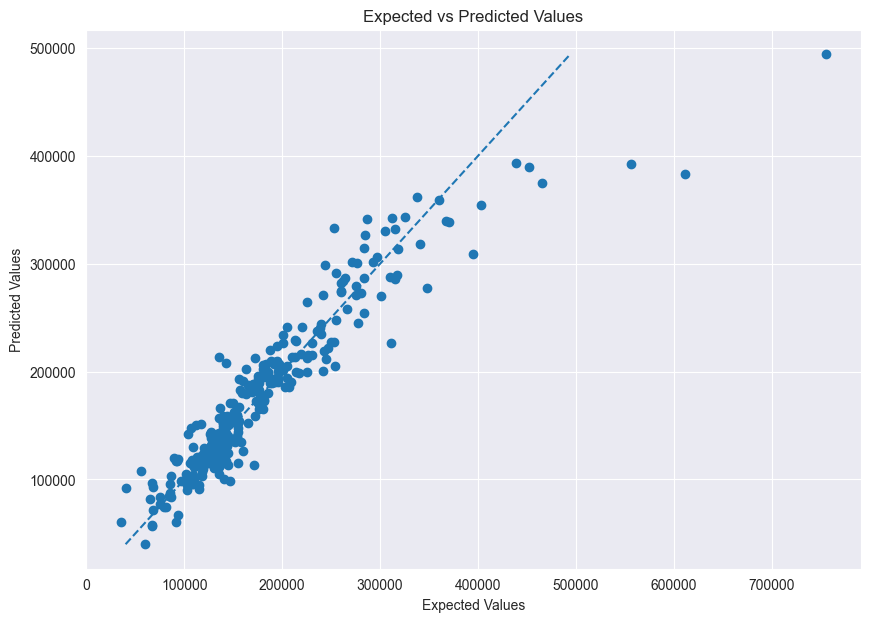

In [84]:
rr.fit(X_train[best_subset], y_train)
y_pred = rr.predict(X_test[best_subset])

plt.figure(figsize = (10,7))
plt.scatter(y_test, y_pred)
min_val = min(y_pred)
max_val = max(y_pred)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Expected vs Predicted Values for Ridge Regression')
plt.grid(True)
plt.show()